In [330]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline

import pandas
import matplotlib as plt
import seaborn as sns

In [331]:
indicators = pandas.read_csv('project data/climate change dataset - worldbank/data - indicators.csv', encoding = "ISO-8859-1")

In [332]:
indicators.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Aruba,ABW,Urban population (% of total population),SP.URB.TOTL.IN.ZS,50.776000,50.761000,50.746000,50.730000,50.715000,50.700000,...,43.059000,42.940000,42.957000,42.990000,43.041000,43.108000,43.192000,43.293000,43.411000,NaN
1,Aruba,ABW,Urban population,SP.URB.TOTL,27526.000000,28141.000000,28532.000000,28761.000000,28924.000000,29082.000000,...,43778.000000,43819.000000,44057.000000,44348.000000,44665.000000,44979.000000,45296.000000,45616.000000,45948.000000,NaN
2,Aruba,ABW,Urban population growth (annual %),SP.URB.GROW,3.117931,2.209658,1.379868,0.799404,0.565140,0.544773,...,-0.626205,0.093611,0.541674,0.658336,0.712259,0.700552,0.702301,0.703980,0.725179,NaN
3,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.000000,55438.000000,56225.000000,56695.000000,57032.000000,57360.000000,...,101669.000000,102046.000000,102560.000000,103159.000000,103774.000000,104341.000000,104872.000000,105366.000000,105845.000000,NaN
4,Aruba,ABW,Population growth (annual %),SP.POP.GROW,3.148037,2.238144,1.409622,0.832453,0.592649,0.573468,...,0.210709,0.370125,0.502430,0.582349,0.594397,0.544892,0.507618,0.469944,0.453576,NaN


In [333]:
temperature = pandas.read_csv('project data/climate change dataset - worldbank/data - temperature.csv')

In [334]:
temperature.head(12)

,Temperature - (Celsius),Year,Statistics,Country,Country Code
0,-0.03110,1991,Jan Average,Afghanistan,AFG
1,1.43654,1991,Feb Average,Afghanistan,AFG
2,6.88685,1991,Mar Average,Afghanistan,AFG
3,12.93970,1991,Apr Average,Afghanistan,AFG
4,17.07550,1991,May Average,Afghanistan,AFG
5,23.07770,1991,Jun Average,Afghanistan,AFG
6,25.57100,1991,Jul Average,Afghanistan,AFG
7,23.96730,1991,Aug Average,Afghanistan,AFG
8,19.38000,1991,Sep Average,Afghanistan,AFG
9,12.87790,1991,Oct Average,Afghanistan,AFG


In [335]:
rainfall = pandas.read_csv('project data/climate change dataset - worldbank/data - rainfall.csv', encoding = "ISO-8859-1")

In [336]:
try:
    del rainfall['Unnamed: 5']
except:
    pass
rainfall.head(12)

,Rainfall - (MM),Year,Statistics,Country,Code
0,64.77650,1991,Jan Average,Afghanistan,AFG
1,59.40250,1991,Feb Average,Afghanistan,AFG
2,119.62500,1991,Mar Average,Afghanistan,AFG
3,51.80250,1991,Apr Average,Afghanistan,AFG
4,57.24380,1991,May Average,Afghanistan,AFG
5,5.58788,1991,Jun Average,Afghanistan,AFG
6,4.39142,1991,Jul Average,Afghanistan,AFG
7,4.66582,1991,Aug Average,Afghanistan,AFG
8,12.63480,1991,Sep Average,Afghanistan,AFG
9,4.09568,1991,Oct Average,Afghanistan,AFG


In [337]:
# code to convert the indicators to following format 
'''
    SN      Country        Country Code        Year          % of Agricultural land        Forest Area
    1       Nepal          NEP                 2019           10 
'''

data = {}
rows = []

# print(indicators['Indicator Name'].unique())          

'\n    SN      Country        Country Code        Year          % of Agricultural land        Forest Area\n    1       Nepal          NEP                 2019           10 \n'

In [355]:
columns_controls = [
    'Agricultural land (sq. km)',
    'Forest area (sq. km)',
    'Nitrous oxide emissions (thousand metric tons of CO2 equivalent)',
    'Methane emissions (kt of CO2 equivalent)',
    'CO2 emissions (kt)',
    'Energy use (kg of oil equivalent per capita)'
]

columns = ['Country Name', 'Country Code']
indicator_names = []
for index, row in indicators.iterrows():
    if row['Indicator Name'] not in columns_controls:
        continue
        
    if row['Indicator Name'] not in columns:
        columns.append(row['Indicator Name'])
        
    if row['Indicator Name'] not in indicator_names:
        indicator_names.append(row['Indicator Name'])

columns.append('Year')
# MAKE THE DATAFRAME
new_indicators = pandas.DataFrame([], columns=columns)

previous_country = None
rows = []

        
for index, row in indicators.iterrows():
    if row['Indicator Name'] not in columns_controls:
        continue
    
    if row['Country Name'] != previous_country:
        if previous_country is not None:
            for year in range(1991, 2020): 
                insert_data  = {
                    'Country Name': data['Country Name'],
                    'Country Code': data['Country Code'],
                    'Year': str(year)
                }

                for indicator in data[str(year)]:
                    insert_data[indicator] = data[str(year)][indicator]

                new_indicators = new_indicators.append(insert_data , ignore_index=True)
        previous_country = row['Country Name']
                
        data = {
            'Country Name': '',
            'Country Code': ''    
        }

        for year in range(1991, 2020):
            data[str(year)] = {}
            for each_col in indicator_names:
                data[str(year)][each_col] = ''
        
    data ['Country Name'] = row ['Country Name']
    data ['Country Code'] = row ['Country Code']
    
    for year in range(1991, 2020): 
        data[str(year)][row['Indicator Name']] = row[str(year)]

for year in range(1991, 2020): 
    insert_data  = {
        'Country Name': data['Country Name'],
        'Country Code': data['Country Code'],
        'Year': str(year)
    }

    for indicator in data[str(year)]:
        insert_data[indicator] = data[str(year)][indicator]

    new_indicators = new_indicators.append(insert_data , ignore_index=True)

In [356]:
print(indicator_names)  

['Nitrous oxide emissions (thousand metric tons of CO2 equivalent)', 'Methane emissions (kt of CO2 equivalent)', 'CO2 emissions (kt)', 'Energy use (kg of oil equivalent per capita)', 'Forest area (sq. km)', 'Agricultural land (sq. km)']


In [357]:
new_indicators

,Country Name,Country Code,Nitrous oxide emissions (thousand metric tons of CO2 equivalent),Methane emissions (kt of CO2 equivalent),CO2 emissions (kt),Energy use (kg of oil equivalent per capita),Forest area (sq. km),Agricultural land (sq. km),Year
0,Aruba,ABW,11.862274,15.486000,1683.153,NaN,4.2000,20.0,1991
1,Aruba,ABW,12.133462,15.898000,1463.133,NaN,4.2000,20.0,1992
2,Aruba,ABW,12.684115,16.386100,1595.145,NaN,4.2000,20.0,1993
3,Aruba,ABW,13.239976,16.876800,1613.480,NaN,4.2000,20.0,1994
4,Aruba,ABW,13.292831,17.296400,1668.485,NaN,4.2000,20.0,1995
5,Aruba,ABW,8.335714,16.964000,1690.487,NaN,4.2000,20.0,1996
6,Aruba,ABW,38.427600,21.518300,1745.492,NaN,4.2000,20.0,1997
7,Aruba,ABW,6.535978,17.347800,1796.830,NaN,4.2000,20.0,1998
8,Aruba,ABW,5.815693,17.554600,1807.831,NaN,4.2000,20.0,1999
9,Aruba,ABW,5.468121,18.051400,2379.883,NaN,4.2000,20.0,2000


In [348]:
# find rainfall average across different year in different month

data = {}
countries = []

for index, row in rainfall.iterrows():
    row = dict(row)
    # print(row)
    
    key = ''   + str(row[' Year']) + ' - ' 
    key += str(row[' Statistics']).replace('Average','').strip()

    if key not in data:
        data [key] = row['Rainfall - (MM)']
    else:
        data [key] += row['Rainfall - (MM)']
    
    if row[' Country'] not in countries:
        countries.append(row[' Country'])

# count unique data
count = len(countries)

# perform average for all years
for each_year in data:
    data[each_year] = data[each_year] / count

# print(data)

In [349]:
rainfall_df = pandas.DataFrame(columns =['Year', 'Month', 'Rainfall'])

for each_data in data:
    year, month, rainfall = each_data.split(' - ')[0], each_data.split(' - ')[1], data[each_data]
    rainfall_df = rainfall_df.append({'Year' : year , 'Month' : month, 'Rainfall': rainfall} , ignore_index=True)

rainfall_df[rainfall_df['Month']=='Dec'].head(30)

,Year,Month,Rainfall
11,1991,Dec,89.675973
23,1992,Dec,95.032257
35,1993,Dec,95.115177
47,1994,Dec,88.516055
59,1995,Dec,96.956360
71,1996,Dec,90.675354
83,1997,Dec,95.736883
95,1998,Dec,105.974799
107,1999,Dec,102.214666
119,2000,Dec,98.330999


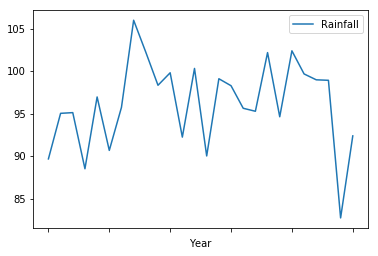

In [350]:
# rainfall_df[rainfall_df['Month']=='Jan'].plot.line(x='Year', y='Rainfall')
# rainfall_df[rainfall_df['Month']=='Feb'].plot.line(x='Year', y='Rainfall')
# rainfall_df[rainfall_df['Month']=='Mar'].plot.line(x='Year', y='Rainfall')
# rainfall_df[rainfall_df['Month']=='Apr'].plot.line(x='Year', y='Rainfall')
# rainfall_df[rainfall_df['Month']=='May'].plot.line(x='Year', y='Rainfall')
# rainfall_df[rainfall_df['Month']=='Jun'].plot.line(x='Year', y='Rainfall')
# rainfall_df[rainfall_df['Month']=='Jul'].plot.line(x='Year', y='Rainfall')
# rainfall_df[rainfall_df['Month']=='Aug'].plot.line(x='Year', y='Rainfall')
# rainfall_df[rainfall_df['Month']=='Sep'].plot.line(x='Year', y='Rainfall')
# rainfall_df[rainfall_df['Month']=='Oct'].plot.line(x='Year', y='Rainfall')
# rainfall_df[rainfall_df['Month']=='Nov'].plot.line(x='Year', y='Rainfall')
rainfall_df[rainfall_df['Month']=='Dec'].plot.line(x='Year', y='Rainfall')

In [351]:
# Plot rainfall pattern in Afghanistan for all months in year
rainfall[(rainfall['Code']==' AFG') & (rainfall[' Statistics']==' Jan Average')].head()
rainfall[(rainfall['Code']==' AFG') & (rainfall[' Statistics']==' Jan Average')].plot.line(x=' Year', y='Rainfall - (MM)')
rainfall[(rainfall['Code']==' AFG') & (rainfall[' Statistics']==' Feb Average')].plot.line(x=' Year', y='Rainfall - (MM)')
rainfall[(rainfall['Code']==' AFG') & (rainfall[' Statistics']==' Mar Average')].plot.line(x=' Year', y='Rainfall - (MM)')
rainfall[(rainfall['Code']==' AFG') & (rainfall[' Statistics']==' Apr Average')].plot.line(x=' Year', y='Rainfall - (MM)')

rainfall[(rainfall['Code']==' AFG') & (rainfall[' Statistics']==' May Average')].plot.line(x=' Year', y='Rainfall - (MM)')
rainfall[(rainfall['Code']==' AFG') & (rainfall[' Statistics']==' Jun Average')].plot.line(x=' Year', y='Rainfall - (MM)')
rainfall[(rainfall['Code']==' AFG') & (rainfall[' Statistics']==' Jul Average')].plot.line(x=' Year', y='Rainfall - (MM)')
rainfall[(rainfall['Code']==' AFG') & (rainfall[' Statistics']==' Aug Average')].plot.line(x=' Year', y='Rainfall - (MM)')

rainfall[(rainfall['Code']==' AFG') & (rainfall[' Statistics']==' Sep Average')].plot.line(x=' Year', y='Rainfall - (MM)')
rainfall[(rainfall['Code']==' AFG') & (rainfall[' Statistics']==' Oct Average')].plot.line(x=' Year', y='Rainfall - (MM)')
rainfall[(rainfall['Code']==' AFG') & (rainfall[' Statistics']==' Nov Average')].plot.line(x=' Year', y='Rainfall - (MM)')
rainfall[(rainfall['Code']==' AFG') & (rainfall[' Statistics']==' Dec Average')].plot.line(x=' Year', y='Rainfall - (MM)')

TypeError: 'float' object is not subscriptable

In [352]:
# Plot rainfall pattern in Nepal for all months in year
rainfall[(rainfall['Code']==' NPL') & (rainfall[' Statistics']==' Jan Average')].head()
rainfall[(rainfall['Code']==' NPL') & (rainfall[' Statistics']==' Jan Average')].plot.line(x=' Year', y='Rainfall - (MM)')
rainfall[(rainfall['Code']==' NPL') & (rainfall[' Statistics']==' Feb Average')].plot.line(x=' Year', y='Rainfall - (MM)')
rainfall[(rainfall['Code']==' NPL') & (rainfall[' Statistics']==' Mar Average')].plot.line(x=' Year', y='Rainfall - (MM)')
rainfall[(rainfall['Code']==' NPL') & (rainfall[' Statistics']==' Apr Average')].plot.line(x=' Year', y='Rainfall - (MM)')

rainfall[(rainfall['Code']==' NPL') & (rainfall[' Statistics']==' May Average')].plot.line(x=' Year', y='Rainfall - (MM)')
rainfall[(rainfall['Code']==' NPL') & (rainfall[' Statistics']==' Jun Average')].plot.line(x=' Year', y='Rainfall - (MM)')
rainfall[(rainfall['Code']==' NPL') & (rainfall[' Statistics']==' Jul Average')].plot.line(x=' Year', y='Rainfall - (MM)')
rainfall[(rainfall['Code']==' NPL') & (rainfall[' Statistics']==' Aug Average')].plot.line(x=' Year', y='Rainfall - (MM)')

rainfall[(rainfall['Code']==' NPL') & (rainfall[' Statistics']==' Sep Average')].plot.line(x=' Year', y='Rainfall - (MM)')
rainfall[(rainfall['Code']==' NPL') & (rainfall[' Statistics']==' Oct Average')].plot.line(x=' Year', y='Rainfall - (MM)')
rainfall[(rainfall['Code']==' NPL') & (rainfall[' Statistics']==' Nov Average')].plot.line(x=' Year', y='Rainfall - (MM)')
rainfall[(rainfall['Code']==' NPL') & (rainfall[' Statistics']==' Dec Average')].plot.line(x=' Year', y='Rainfall - (MM)')

TypeError: 'float' object is not subscriptable

In [353]:
rainfall['Code'].unique()

TypeError: 'float' object is not subscriptable

In [354]:
rainfall.head()

AttributeError: 'float' object has no attribute 'head'

In [341]:
new_indicators.head()

,Country Name,Country Code,Urban population (% of total population),Agricultural irrigated land (% of total agricultural land),Forest area (% of land area),Forest area (sq. km),Agricultural land (% of land area),Agricultural land (sq. km),Year
0,Aruba,ABW,50.304,NaN,2.333333,4.2,11.111111,20.0,1991
1,Aruba,ABW,49.998,NaN,2.333333,4.2,11.111111,20.0,1992
2,Aruba,ABW,49.588,NaN,2.333333,4.2,11.111111,20.0,1993
3,Aruba,ABW,49.177,NaN,2.333333,4.2,11.111111,20.0,1994
4,Aruba,ABW,48.767,NaN,2.333333,4.2,11.111111,20.0,1995


In [342]:
new_indicators['Country Code'] = new_indicators['Country Code'].apply(lambda x: str(x).strip())
rainfall['Code'] = rainfall['Code'].apply(lambda x: x.strip())
rainfall[' Statistics'] = rainfall[' Statistics'].apply(lambda x: str(x).strip())

rainfall[' Year'] = rainfall[' Year'].apply(lambda x: str(int(x)))
new_indicators['Year'] = new_indicators['Year'].apply(lambda x: str(int(x)))

result = rainfall[rainfall[' Statistics'] == 'Jan Average'].merge(
    new_indicators, left_on=['Code', ' Year'], 
    right_on=['Country Code', 'Year'], 
    how='inner'
)

In [343]:
result.head()

,Rainfall - (MM),Year,Statistics,Country,Code,Country Name,Country Code,Urban population (% of total population),Agricultural irrigated land (% of total agricultural land),Forest area (% of land area),Forest area (sq. km),Agricultural land (% of land area),Agricultural land (sq. km),Year
0,64.7765,1991,Jan Average,Afghanistan,AFG,Afghanistan,AFG,21.266,NaN,2.067825,13500.0,58.251386,380300.0,1991
1,75.1985,1992,Jan Average,Afghanistan,AFG,Afghanistan,AFG,21.355,NaN,2.067825,13500.0,58.251386,380300.0,1992
2,47.9213,1993,Jan Average,Afghanistan,AFG,Afghanistan,AFG,21.444,NaN,2.067825,13500.0,58.104341,379340.0,1993
3,50.3801,1994,Jan Average,Afghanistan,AFG,Afghanistan,AFG,21.534,NaN,2.067825,13500.0,57.919003,378130.0,1994
4,13.7274,1995,Jan Average,Afghanistan,AFG,Afghanistan,AFG,21.624,NaN,2.067825,13500.0,57.827099,377530.0,1995


In [344]:
new_indicators[(new_indicators['Year'] == '1991')].head(100)

,Country Name,Country Code,Urban population (% of total population),Agricultural irrigated land (% of total agricultural land),Forest area (% of land area),Forest area (sq. km),Agricultural land (% of land area),Agricultural land (sq. km),Year
0,Aruba,ABW,50.304000,NaN,2.333333,4.200000e+00,11.111111,2.000000e+01,1991
29,Afghanistan,AFG,21.266000,NaN,2.067825,1.350000e+04,58.251386,3.803000e+05,1991
58,Angola,AGO,38.580000,NaN,48.809817,6.085120e+05,46.081656,5.745000e+05,1991
87,Albania,ALB,36.700000,NaN,28.717152,7.868500e+03,41.131387,1.127000e+04,1991
116,Andorra,AND,94.530000,NaN,34.042553,1.600000e+02,48.936170,2.300000e+02,1991
145,Arab World,ARB,50.783053,NaN,1.727574,1.941000e+05,31.639377,3.554814e+06,1991
174,United Arab Emirates,ARE,78.906000,NaN,3.541256,2.515000e+03,4.364968,3.100000e+03,1991
203,Argentina,ARG,87.328000,NaN,12.606360,3.449970e+05,46.647593,1.276600e+06,1991
232,Armenia,ARM,67.150000,NaN,11.752722,3.346000e+03,NaN,NaN,1991
261,American Samoa,ASM,81.886000,NaN,91.750002,1.835000e+02,15.000000,3.000000e+01,1991


In [202]:
rainfall[rainfall[' Statistics'] == 'Jan Average']

,Rainfall - (MM),Year,Statistics,Country,Code
0,64.7765,1991,Jan Average,Afghanistan,AFG
12,75.1985,1992,Jan Average,Afghanistan,AFG
24,47.9213,1993,Jan Average,Afghanistan,AFG
36,50.3801,1994,Jan Average,Afghanistan,AFG
48,13.7274,1995,Jan Average,Afghanistan,AFG
60,41.9141,1996,Jan Average,Afghanistan,AFG
72,34.3467,1997,Jan Average,Afghanistan,AFG
84,65.6699,1998,Jan Average,Afghanistan,AFG
96,45.2180,1999,Jan Average,Afghanistan,AFG
108,37.8614,2000,Jan Average,Afghanistan,AFG
